# JARTIC dataset - Exploratory Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to JARTIC data - expected to be in project data folder
# Note: Place the jp_jartic_processed_20230101_to_20231231.csv file in the ../data/ directory
df = pd.read_csv("../data/jp_jartic_processed_20230101_to_20231231.csv", parse_dates=['timestamp'])

In [ ]:
df['weekday'] = df['timestamp'].dt.day_name()

In [15]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8677621 entries, 0 to 8677620
Data columns (total 14 columns):
 #   Column              Dtype              
---  ------              -----              
 0   timestamp           datetime64[ns, UTC]
 1   h3_index_res8       object             
 2   avg_traffic_volume  float64            
 3   max_traffic_volume  int64              
 4   traffic_volume_std  float64            
 5   measurement_count   int64              
 6   avg_distance        float64            
 7   unique_links        int64              
 8   h3_lat_res8         float64            
 9   h3_lon_res8         float64            
 10  prefecture          object             
 11  data_source         object             
 12  country             object             
 13  weekday             object             
dtypes: datetime64[ns, UTC](1), float64(5), int64(3), object(5)
memory usage: 926.9+ MB


,avg_traffic_volume,max_traffic_volume,traffic_volume_std,measurement_count,avg_distance,unique_links,h3_lat_res8,h3_lon_res8
count,8.677621e+06,8.677621e+06,8.119435e+06,8.677621e+06,8.677621e+06,8.677621e+06,8.677621e+06,8.677621e+06
mean,2.693803e+01,5.756698e+01,1.379109e+01,3.518982e+01,5.191792e+01,3.486862e+01,3.580111e+01,1.366581e+02
std,2.219352e+01,5.444943e+01,1.164406e+01,6.188027e+01,4.651530e+01,6.157868e+01,2.867557e+00,3.869053e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,2.612238e+01,1.276863e+02
25%,6.972222e+00,1.600000e+01,4.353410e+00,5.000000e+00,2.837097e+01,5.000000e+00,3.420964e+01,1.334354e+02
50%,2.300000e+01,4.400000e+01,1.086319e+01,1.300000e+01,4.081707e+01,1.300000e+01,3.537383e+01,1.371892e+02
75%,4.234000e+01,8.200000e+01,2.027763e+01,3.600000e+01,5.928000e+01,3.600000e+01,3.654506e+01,1.399405e+02
max,2.880000e+02,9.440000e+03,9.075989e+02,6.940000e+02,7.300000e+02,6.940000e+02,4.537708e+01,1.444370e+02


In [16]:
df.isna().sum()

timestamp                  0
h3_index_res8              0
avg_traffic_volume         0
max_traffic_volume         0
traffic_volume_std    558186
measurement_count          0
avg_distance               0
unique_links               0
h3_lat_res8                0
h3_lon_res8                0
prefecture                 0
data_source                0
country                    0
weekday                    0
dtype: int64

In [17]:
tokyo_df = df[df['prefecture'] == 'tokyo'].copy()
print(tokyo_df.shape)


(69423, 14)


In [18]:
tokyo_df_resampled = tokyo_df.set_index('timestamp').resample('h').mean(numeric_only=True).reset_index()


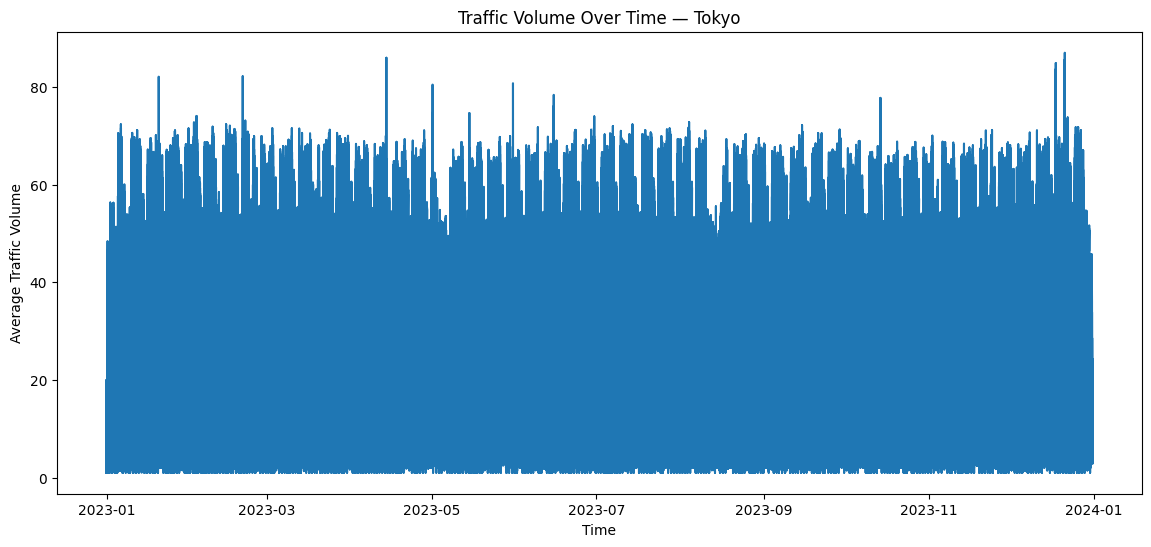

In [19]:
plt.figure(figsize=(14,6))
plt.plot(tokyo_df['timestamp'], tokyo_df['avg_traffic_volume'])
plt.title("Traffic Volume Over Time — Tokyo")
plt.xlabel("Time")
plt.ylabel("Average Traffic Volume")
plt.show()


In [20]:
# Add weekday to tokyo_df before creating lags
tokyo_df['weekday'] = tokyo_df['timestamp'].dt.day_name()

tokyo_df['lag1'] = tokyo_df['avg_traffic_volume'].shift(1)
tokyo_df['lag24'] = tokyo_df['avg_traffic_volume'].shift(24)
tokyo_df = tokyo_df.dropna()
tokyo_df

,timestamp,h3_index_res8,avg_traffic_volume,max_traffic_volume,traffic_volume_std,measurement_count,avg_distance,unique_links,h3_lat_res8,h3_lon_res8,prefecture,data_source,country,weekday,lag1,lag24
2994,2022-12-31 18:00:00+00:00,882f5a371dfffff,16.054711,64,11.037770,329,34.422018,329,35.709630,139.690574,tokyo,jartic,JP,Saturday,9.504202,9.385093
2996,2022-12-31 18:00:00+00:00,882f5a34d7fffff,10.254658,43,9.531710,161,45.919255,161,35.710524,139.563946,tokyo,jartic,JP,Saturday,16.054711,14.947059
2998,2022-12-31 18:00:00+00:00,882f5a3217fffff,15.412121,76,10.132915,495,26.852227,495,35.709214,139.808032,tokyo,jartic,JP,Saturday,10.254658,13.004082
3053,2022-12-31 18:00:00+00:00,882f5b52d9fffff,8.863636,25,6.063965,44,43.204545,44,35.711911,139.311290,tokyo,jartic,JP,Saturday,15.412121,8.627907
3055,2022-12-31 18:00:00+00:00,882f5b5513fffff,2.777778,8,2.073802,18,97.555556,18,35.791446,139.184740,tokyo,jartic,JP,Saturday,8.863636,3.187500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8676688,2023-12-31 14:00:00+00:00,882f5b52d9fffff,12.065217,32,7.755721,46,45.956522,46,35.711911,139.311290,tokyo,jartic,JP,Sunday,11.462766,20.015203
8676690,2023-12-31 14:00:00+00:00,882f5b5513fffff,2.888889,6,1.367217,18,85.888889,18,35.791446,139.184740,tokyo,jartic,JP,Sunday,12.065217,19.307692
8676710,2023-12-31 14:00:00+00:00,882f5b461bfffff,3.500000,4,0.707107,2,85.500000,2,35.791744,139.058782,tokyo,jartic,JP,Sunday,2.888889,4.272727
8676727,2023-12-31 14:00:00+00:00,882f5aaf31fffff,18.666667,86,14.280851,129,25.726562,127,35.622379,139.812136,tokyo,jartic,JP,Sunday,3.500000,3.500000


**Train/test split**

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_squared_error


X = tokyo_df[['lag1', 'lag24']]
y = tokyo_df['avg_traffic_volume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

R²: 0.29981272639910106
RMSE: 264.18748563164934


/Users/vojtech/.pyenv/versions/3.10.6/envs/smoglens/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/vojtech/.pyenv/versions/3.10.6/envs/smoglens/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/vojtech/.pyenv/versions/3.10.6/envs/smoglens/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


**Plotting**

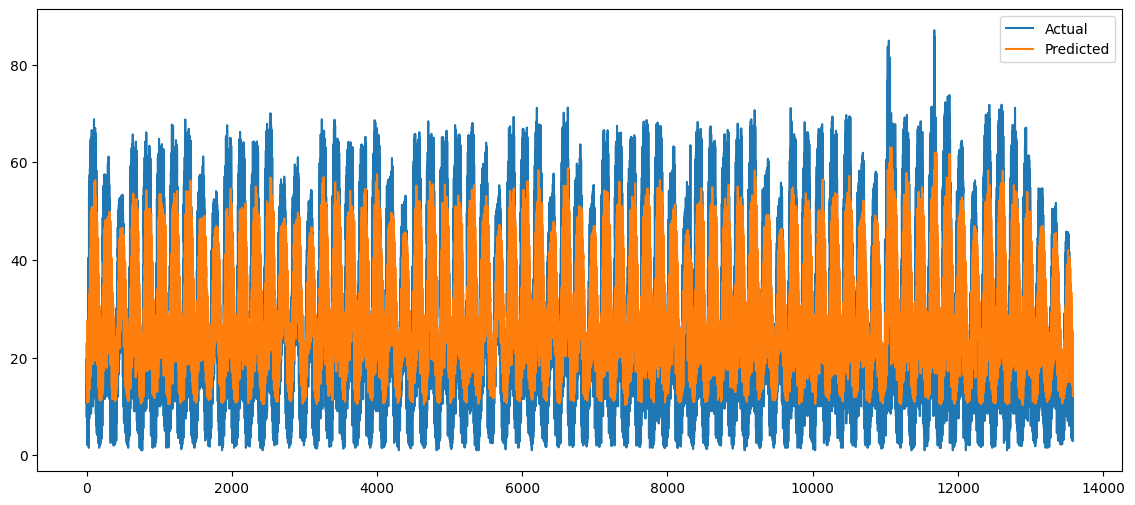

In [22]:
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


**Compares weekday vs weekend traffic**

In [23]:
tokyo_df['weekday_num'] = tokyo_df['weekday'].map({
    'Monday': 0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3,
    'Friday':4, 'Saturday':5, 'Sunday':6
})

tokyo_df['is_weekend'] = tokyo_df['weekday'].isin(['Saturday', 'Sunday'])

tokyo_df['hour'] = tokyo_df['timestamp'].dt.hour

agg = tokyo_df.groupby(['is_weekend', 'hour'])[['avg_traffic_volume', 'lag1', 'lag24']].mean().reset_index()
print(agg)


    is_weekend  hour  avg_traffic_volume       lag1      lag24
0        False     0           43.805178  44.194362  26.915142
1        False     1           44.954605  45.026142  40.162035
2        False     2           45.500185  45.371567  45.549412
3        False     3           44.074532  44.146861  43.801116
4        False     4           42.509839  42.646521  44.964588
5        False     5           44.848228  44.626227  45.453397
6        False     6           45.682990  45.579869  44.107782
7        False     7           46.216106  46.092392  42.522087
8        False     8           46.913515  46.812672  44.866445
9        False     9           46.681976  46.500642  45.707762
10       False    10           39.970450  40.575119  46.176826
11       False    11           32.359288  33.338797  47.234406
12       False    12           26.439637  27.158119  46.987692
13       False    13           22.515363  22.893241  40.163524
14       False    14           18.416911  18.704335  32

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

features = tokyo_df[['lag1', 'lag24', 'hour', 'is_weekend']]
tokyo_df['is_weekend'] = tokyo_df['is_weekend'].astype(int)
features = tokyo_df[['lag1', 'lag24', 'hour', 'is_weekend']]


target = tokyo_df['avg_traffic_volume']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))


R²: 0.3782303058903749
RMSE: 235.36168089707274


/Users/vojtech/.pyenv/versions/3.10.6/envs/smoglens/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/vojtech/.pyenv/versions/3.10.6/envs/smoglens/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/vojtech/.pyenv/versions/3.10.6/envs/smoglens/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
